Kanishk Mair (kmair@andrew.cmu.edu)
Date: 2018-09-24 09:18:23.712245


- ASSIGNMENT: exam1-3
- POINTS: 4
- CATEGORY: exam-1
- RUBRIC: default
- RUBRIC_CATEGORIES: technical, presentation
- RUBRIC_WEIGHTS: 0.8, 0.2
- DUEDATE: 2018-09-24 20:29:59
- GRADER: John Kitchin


**This is an exam problem. It is open note, and you may consult the internet. By turning in this problem, you agree that the work is your own, and you did not work with anyone to complete it. Anything else is considered cheating. If you see students working together on this problem, it is cheating and you should report it.**

In the pressure driven flow of a fluid with viscosity $\mu$ between two stationary plates separated by distance $d$ and driven by a pressure drop $\Delta P/\Delta x$, the governing equations on the velocity $u$ of the fluid are (assuming flow in the x-direction with the velocity varying only in the y-direction):

$\frac{\Delta P}{\Delta x} = \mu \frac{d^2u}{dy^2}$

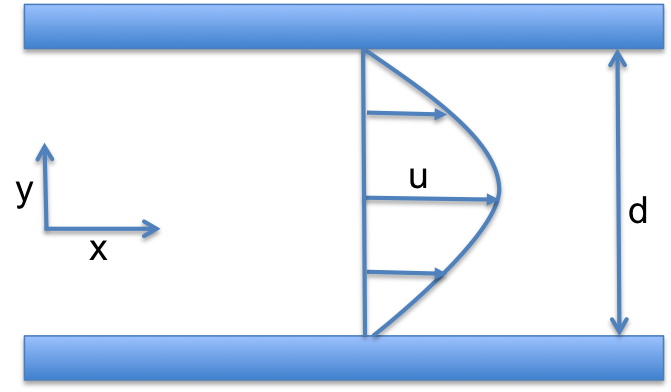

Unlike the initial value problems we have considered so far, we have the boundary conditions: $u(y=0) = 0$ and $u(y=d)=0$, in other words, at the walls the velocity is zero (the no-slip condition). Formally, this problem is called a boundary value problem.

First, convert this ODE to a system of first order differential equations and describe them here:



Let $\displaystyle\frac{du}{dy} = a$

Hence $\displaystyle\frac{\Delta P}{\Delta x} =\mu \frac{da}{dy}$


Write a function that describes the system of ODEs that would be suitable for use with `scipy.integrate.solve_ivp`. Use the following parameter values:

|parameter|value|
|---
|&Delta; P/&Delta; x|-50|
|&mu;|2|



In [5]:
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import numpy as np

mu = 2
dPx = -50

def dPdx(y, X):
    u,a = X
    dudy = a
    dady = dPx / mu
    return np.array([dudy, dady])


def g(u):
    sol = solve_ivp(dPdx, (0,0.2), y0 = np.array([0,u]))
    return sol.y[0][-1]

x1, = fsolve(g, 0.2)
print(f'The maximum velocity we get at centre is: {x1}.')

The maximum velocity we get at centre is: 2.5.


We only know that $u(y=0) = 0$ and $u(y=d)=0$, so we do not have enough information to directly integrate the system of ODEs. Since we have two ODEs in our system, we need two initial conditions, but we only have one, $u(y=0) = 0$; the other condition is on the other side of the plate which is not directly helpful.

However, we can still proceed with what is called the *shooting method*. In this method, we *guess* a value for the other initial condition ($u'(0)=?$), then solve the system of ODEs to the other boundary ($y=d$). Then, we see if $u(d) = 0$. If it does, we have made the right guess, and if not, we make another guess, and repeat until we find the right value that makes $u(d) = 0$.

Use this method to estimate the velocity profile $u(y)$ between the plates. Make a plot of your solution. You do not need to exactly hit 0 at $y=d$, but you should try to get close to it.



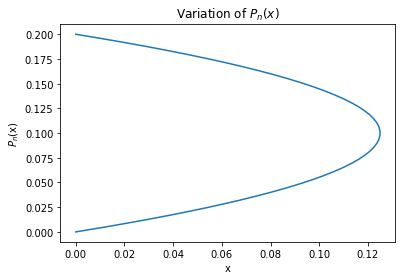

In [19]:
teval = np.linspace(0, 0.2)
sol = solve_ivp(dPdx, (0,0.2), y0 = np.array([0,2.5]), t_eval = teval)
x=sol.t 
y = sol.y[0]

import matplotlib.pyplot as plt
plt.plot(y, x)
plt.xlabel('x')
plt.ylabel('$P_n$(x)')
plt.title('Variation of $P_n(x)$')
plt.show()

In [29]:
lp = y[-1]
print(f'The value of P_n(x) at the boundary is {lp} which is approximately 0 and can hence be said to satisfy the boundary equation.')

The value of P_n(x) at the boundary is -5.134781488891349e-16 which is approximately 0 and can hence be said to satisfy the boundary equation.
